# Airport Data Cleaning

In this data cleaning story, we will work with an airport dataset. It has 2,477 rows of data and 12 variables. We will clear some whitespace, try to fix date variable, play around with some categorical variables (changing case to upper, change the strings to categories, check for inconsistent values, and conduct a value count), check for duplicates, and finally tackle some outliers. So, let's get to it.

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


# Importing as DataFrames
airlines = pd.read_csv('datasets/airlines_final.csv',  index_col = 'Unnamed: 0')

In [ ]:
# Airlines Data Types and Count of Non-Null Values

airlines.info()

# Another option to begin exploring the data, uncomment it to check it out

# airlines.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 2808
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2477 non-null   int64  
 1   day            2477 non-null   object 
 2   airline        2477 non-null   object 
 3   destination    2477 non-null   object 
 4   dest_region    2477 non-null   object 
 5   dest_size      2477 non-null   object 
 6   boarding_area  2477 non-null   object 
 7   dept_time      2477 non-null   object 
 8   wait_min       2477 non-null   float64
 9   cleanliness    2477 non-null   object 
 10  safety         2477 non-null   object 
 11  satisfaction   2477 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 251.6+ KB


## Summary of airlines.dtypes

From the initial view, we have a dataframe consisting of 12 variables and 2,477 rows of data. Out of the gate, something fishy is going on with the row indexs. They seem to be labeled 0 - 2,808. That doesn't make much sense to me as there are only 2,477 row entries. Looking at the variables, the variable 'day' may need to be changed to date. This all depends on how we want to utilize the variable. Variable 'dest_size' may need to be categorized and factored. Variable 'dept_time' looks like it will need some work. Variables 'cleanliness', 'safety', and 'satisfaction' all appear to be category variables. This can be confirmed by looking at an extended .head(15). 

In [ ]:
airlines.head(25)

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
5,634,Thursday,ALASKA,NEWARK,East US,Hub,Gates 50-59,2018-12-31,140.0,Somewhat clean,Very safe,Very satisfied
6,2578,Saturday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,63.0,Clean,Very safe,Somewhat satsified
8,2592,Saturday,AEROMEXICO,MEXICO CITY,Canada/Mexico,Hub,Gates 1-12,2018-12-31,215.0,Somewhat clean,Very safe,Neutral
9,919,Friday,AIR CANADA,TORONTO,Canada/Mexico,Hub,Gates 91-102,2018-12-31,70.0,Somewhat clean,Somewhat safe,Somewhat satsified
10,3028,Tuesday,UNITED,PORTLAND,West US,Medium,Gates 70-90,2018-12-31,180.0,Average,Very safe,Neutral


## Fishy Business

Aside from the row index being a little fishy, the 'day' column has several different days listed; however, the 'dept_time' column all state 2018-12-31. From here, we will try to clean up the dataframe, check for duplicates, and try to reset the index. Following that, we will explore a few variables such as 'wait_min' as it looks to have some extreme outliers.

In [ ]:
# Reseting the index
airlines.reset_index(drop=True, inplace=True)
airlines.info()
# Great, it worked.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2477 non-null   int64  
 1   day            2477 non-null   object 
 2   airline        2477 non-null   object 
 3   destination    2477 non-null   object 
 4   dest_region    2477 non-null   object 
 5   dest_size      2477 non-null   object 
 6   boarding_area  2477 non-null   object 
 7   dept_time      2477 non-null   object 
 8   wait_min       2477 non-null   float64
 9   cleanliness    2477 non-null   object 
 10  safety         2477 non-null   object 
 11  satisfaction   2477 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 232.3+ KB


In [ ]:
# Let's clear some white space if any exists
cols = airlines.select_dtypes('object').columns
airlines[cols] = airlines[cols].apply(lambda x: x.str.strip())
airlines.info()
# Nothing appears to have changed, so if there was whitespace it is gone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2477 non-null   int64  
 1   day            2477 non-null   object 
 2   airline        2477 non-null   object 
 3   destination    2477 non-null   object 
 4   dest_region    2477 non-null   object 
 5   dest_size      2477 non-null   object 
 6   boarding_area  2477 non-null   object 
 7   dept_time      2477 non-null   object 
 8   wait_min       2477 non-null   float64
 9   cleanliness    2477 non-null   object 
 10  safety         2477 non-null   object 
 11  satisfaction   2477 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 232.3+ KB


In [ ]:
# Let's work on the 'dept_time' prior to working on 'day'
airlines['dept_time'] = pd.to_datetime(airlines['dept_time']).dt.date
airlines.tail()
# The variable has changed to a date, but they are all still December 31 with no actual time element.
# To proceed, I would ignore or delete it and discuss the issue with a Data Engineer.

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2473,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied
2476,2162,Saturday,CHINA EASTERN,QINGDAO,Asia,Large,Gates 1-12,2018-12-31,220.0,Clean,Very safe,Somewhat satsified


### Working with categories

Over the next few code blocks, we will look at the categorical variables. I will treat the 'day' column as a category. We will change them to categories, check for value inconsistencies, and change the case. If there are any inconsistencies, we will need to collapse them.

In [ ]:
# Let's look at some categories
airlines['cleanliness'] = airlines['cleanliness'].str.upper()

cleanliness = airlines['cleanliness']

cleanliness.value_counts()

SOMEWHAT CLEAN    1175
CLEAN              885
AVERAGE            389
SOMEWHAT DIRTY      26
DIRTY                2
Name: cleanliness, dtype: int64

In [ ]:
# Let's look at some categories
airlines['safety'] = airlines['safety'].str.upper()
safety = airlines['safety']

safety.value_counts()

VERY SAFE          1296
SOMEWHAT SAFE       864
NEUTRAL             303
VERY UNSAFE           8
SOMEWHAT UNSAFE       6
Name: safety, dtype: int64

In [ ]:
# Let's look at some categories
airlines['satisfaction'] = airlines['satisfaction'].str.upper()

satisfaction = airlines['satisfaction']

satisfaction.value_counts()

SOMEWHAT SATSIFIED      1349
VERY SATISFIED           596
NEUTRAL                  486
SOMEWHAT UNSATISFIED      42
VERY UNSATISFIED           4
Name: satisfaction, dtype: int64

In [ ]:
# Let's look at some categories
airlines['day'] = airlines['day'].str.upper()

day = airlines['day']

day.value_counts()

TUESDAY      535
WEDNESDAY    518
THURSDAY     488
FRIDAY       368
SUNDAY       267
SATURDAY     210
MONDAY        91
Name: day, dtype: int64

In [ ]:
# Let's look at some categories
airlines['dest_size'] = airlines['dest_size'].str.upper()

dest_size = airlines['dest_size']

dest_size.value_counts()

HUB       1550
MEDIUM     600
SMALL      200
LARGE      127
Name: dest_size, dtype: int64

In [ ]:
# There doesn't seem to be any inconsistencies with the following, so lets change them to categories.
airlines['cleanliness'] = airlines['cleanliness'].astype('category')
airlines['safety'] = airlines['safety'].astype('category')
airlines['satisfaction'] = airlines['satisfaction'].astype('category')
airlines['day'] = airlines['day'].astype('category')
airlines['dest_size'] = airlines['dest_size'].astype('category')
airlines.info()
# Success, I will not factorize them at this time.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             2477 non-null   int64   
 1   day            2477 non-null   category
 2   airline        2477 non-null   object  
 3   destination    2477 non-null   object  
 4   dest_region    2477 non-null   object  
 5   dest_size      2477 non-null   category
 6   boarding_area  2477 non-null   object  
 7   dept_time      2477 non-null   object  
 8   wait_min       2477 non-null   float64 
 9   cleanliness    2477 non-null   category
 10  safety         2477 non-null   category
 11  satisfaction   2477 non-null   category
dtypes: category(5), float64(1), int64(1), object(5)
memory usage: 148.8+ KB


In [ ]:
# Let's look at 'dest_region'
airlines['dest_region'] = airlines['dest_region'].str.upper()

dest_region = airlines['dest_region']
dest_region.value_counts()

WEST US                  864
EAST US                  436
EUROPE                   272
MIDWEST US               251
ASIA                     226
CANADA/MEXICO            198
EUR                       79
MIDDLE EAST               69
AUSTRALIA/NEW ZEALAND     60
CENTRAL/SOUTH AMERICA     22
Name: dest_region, dtype: int64

In [ ]:
# 'dest_region' has a membership constraint
# Three solution: Dropping Data, Remapping, and [Inferring <- will not be covered]
# There is a EUROPE and EUR category, you could drop the inconsistent values; however I never recommend that
# If you wanted to drop, this code will do that, but it is commented out

#Dropping Example

# Step 1: Create a dataframe with correct categories
categories = pd.DataFrame()
categories['region_cat'] = ['WEST US', 'EAST US', 'EUROPE', 'MIDWEST US', 'ASIA', 'CANADA/MEXICO', 'MIDDLE EAST', 'AUSTRALIA/NEW ZEALAND', 'CENTRAL/SOUTH AMERICA']
# Step 2: Define the difference
inconsistent_cat = set(airlines['dest_region']).difference(categories['region_cat'])
# print(inconsistent_cat) # This will show you the membership constraint
# Step 3: Subset inconsistent rows
inconsistent_rows = airlines['dest_region'].isin(inconsistent_cat)
# airlines[inconsistent_rows] # This will print the inconsistent rows
# Step 4: Drop inconsistent rows
# airlines = airlines[~inconsistent_rows]
# airlines.info()

# After dropping, you will need to reset the index.

In [ ]:
# Remapping Example
airlines['dest_region'] = airlines['dest_region'].replace(to_replace=['EUR'], value='EUROPE')
airlines['dest_region'].value_counts()
airlines['dest_region'] = airlines['dest_region'].astype('category')

In [ ]:
# Let's check out 'airline'
airlines['airline'] = airlines['airline'].str.upper()

airline = airlines['airline']
airline.value_counts()

# A potential issue is with UNITED and UNITED INTL, but I will leave it alone. If you want to change it, follow the remapping example.

UNITED                 526
ALASKA                 315
SOUTHWEST              184
AMERICAN               175
DELTA                  170
UNITED INTL            155
JETBLUE                144
AIR CANADA             133
AIR FRANCE/KLM         120
CATHAY PACIFIC          81
LUFTHANSA               64
FRONTIER                41
EMIRATES                39
WOW                     38
VIRGIN ATLANTIC         32
TURKISH AIRLINES        30
QANTAS                  28
AIR NEW ZEALAND         21
BRITISH AIRWAYS         21
AER LINGUS              18
INTERJET                18
COPA                    16
SINGAPORE AIRLINES      16
PHILIPPINE AIRLINES     14
CHINA EASTERN           13
KOREAN AIR              12
HAWAIIAN AIR            12
AEROMEXICO              11
EVA AIR                 10
AIR CHINA                8
AVIANCA                  6
CHINA SOUTHERN           4
ANA ALL NIPPON           2
Name: airline, dtype: int64

In [ ]:
# Let's check out 'destination'
airlines['destination'] = airlines['destination'].str.upper()

destination = airlines['destination']
print(destination.value_counts())

# There are 72 different values, this is not impossible but we will check for duplicates next.

LOS ANGELES        185
PARIS-DE GAULLE    126
DENVER              96
HONG KONG           95
LONDON HEATHROW     91
                  ... 
WUHAN                4
ONTARIO (CALIF)      3
QINGDAO              3
NEW ORLEANS          3
EUGENE               1
Name: destination, Length: 72, dtype: int64


In [ ]:
# Duplicate check
columns_to_check = ['id', 'day', 'airline']

duplicates = airlines.duplicated(subset = columns_to_check, keep = False)
airlines[duplicates]

# There does not seem to be any duplicates

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction


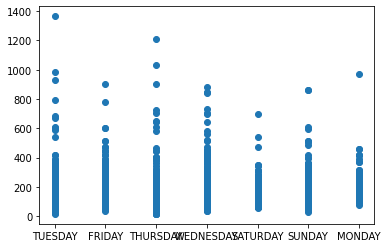

In [ ]:
# Time to tackle the outliers in 'wait_min'

#Step 1: Plot the data
plt.scatter(x = 'day', y = 'wait_min', data = airlines)
plt.show()

In [ ]:
# Step 2: Get the statistical summary
airlines['wait_min'].describe()

count    2477.000000
mean      166.084376
std       107.643625
min        15.000000
25%       105.000000
50%       145.000000
75%       185.000000
max      1365.000000
Name: wait_min, dtype: float64

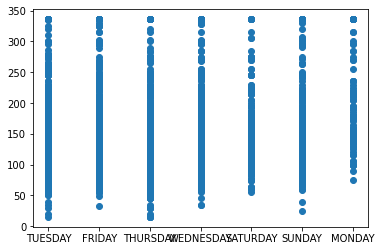

In [ ]:
#Step 3: Replace outliers with the 95 percentile

wait_95 = airlines['wait_min'].quantile(0.95)
airlines.loc[airlines['wait_min'] > wait_95, 'wait_min'] = wait_95

#Step 4: Replot
plt.scatter(x = 'day', y = 'wait_min', data = airlines)
plt.show()

# This was just an example to show a way of how to deal with outliers. Prior to do that, I would conduct a fact finding mission to make sure some of those extreme outliers would actual instances. We all have had long delays for flights.

In [ ]:
# Last item, we may want a column indicating if the flight is domestic or international.

dest_us = ['WEST US', 'EAST US', 'MIDWEST US']
airlines['international'] = np.where(airlines['dest_region'].isin(dest_us), 'NO', 'YES')
airlines['international'].value_counts()

NO     1551
YES     926
Name: international, dtype: int64

### Closing Remarks
In this exercise, we looked at an airline dataset. We reset the index. We worked with a date column; however, the data was faulty and will need to address this issue with the data owner or data engineer feeding you the data. We verified catergories and changed those strings to categories. We looked category inconsistencies and remapped the inconsistent values. We looked data that was potentially out of range and reset the outliers to be within the statistical range. Finally, we created a new column based on conditions in another column. Once again, prior to resetting outliers or dropping values, I would fact find and if those outliers are true instances, and limited to 1 or 2 instances, maybe dropping the values would be better. I also provided code on how to drop inconsistent values.

I hope you enjoyed this tutorial. Send me a like or share it if this helped you in any way.